# Logistic Regression


## Linear Regression


### What is it?
Models $y$ as a linear function of $x$. 



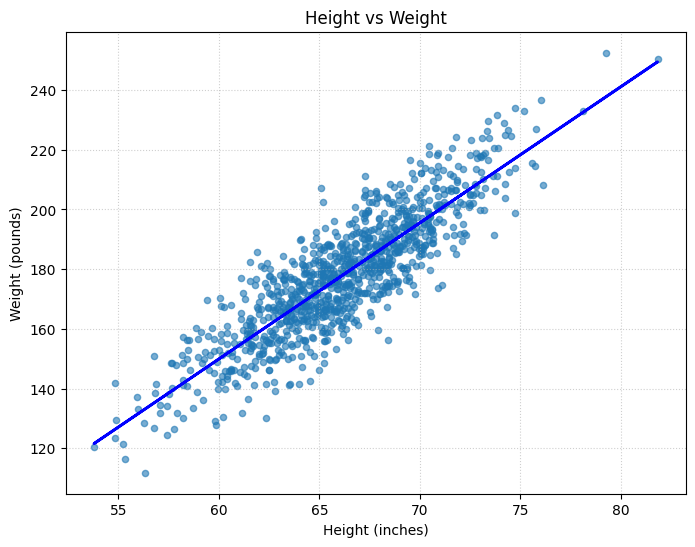

In [1]:
!pip install -q matplotlib
!pip install -q pandas
!pip install -q statsmodels
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm  # For the regression line

# Set seed for reproducibility
np.random.seed(1)

n = 1000  # number of observations

# Generate random heights (in inches)
heights = np.random.normal(loc=66, scale=4, size=n)

# Generate weights (in pounds) with a linear relationship to height
epsilon = np.random.normal(loc=0, scale=10, size=n)  # Error term
beta0 = -120  # Intercept parameter (base weight)  Note:  Often needs adjustment
beta1 = 4.5  # Slope parameter (weight per inch)   Note:  Often needs adjustment

weights = beta0 + beta1 * heights + epsilon

# Create data frame
df = pd.DataFrame({'Height': heights, 'Weight': weights})

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of the data
ax.scatter(df['Height'], df['Weight'], alpha=0.6, s=20)  # Adjust 's' for point size

# Add regression line (using statsmodels for a clean fit)
model = sm.ols("Weight ~ Height", data=df).fit()
predictions = model.predict(df)
ax.plot(df['Height'], predictions, color='blue', linewidth=2)


# Add labels and title
ax.set_xlabel("Height (inches)")
ax.set_ylabel("Weight (pounds)")
ax.set_title("Height vs Weight")

# Customize appearance (optional, but good practice)
ax.grid(True, linestyle=':', alpha=0.6)  # Add a subtle grid
# ax.set_facecolor('#f0f0f0') # Optional: Light gray background

plt.show()

# --- Alternative Plotting (using Seaborn, even simpler) ---
# import seaborn as sns
# sns.regplot(x='Height', y='Weight', data=df, ci=None, scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
# plt.show()



### Limitation

But we didn’t impose a restriction on the values that $y$ can take, meaning it can range from $- \infty$ to $\infty$. But the answer to some questions cannot take just any value.


For example, we can try to predict the probability of something, such as if a person is obese.



$$P(obese=1 | X)=\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon$$



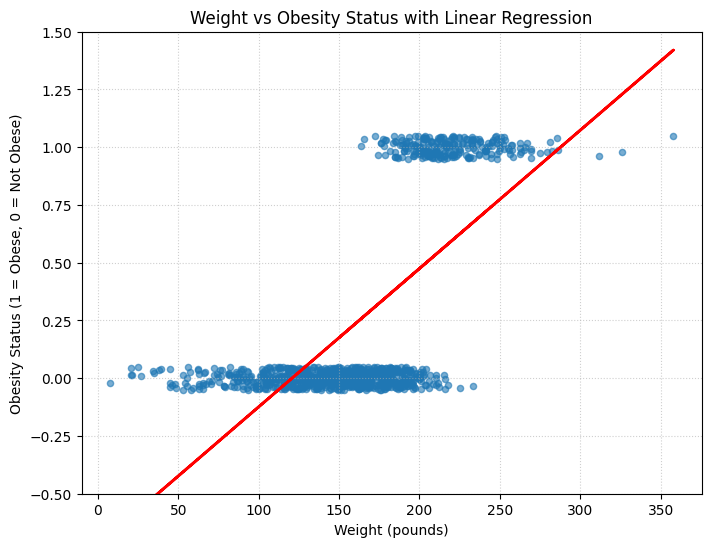

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

# Set seed for reproducibility
np.random.seed(1)

n = 1000  # number of observations

# Generate random weights (in pounds)
weights = np.random.normal(loc=160, scale=50, size=n)

# Generate binary obesity status (1 for obese, 0 for not obese)
obesity_threshold = 200
# Logistic function for probability of obesity
prob_obese = 1 / (1 + np.exp(-(weights - obesity_threshold) / 10))
obesity_status = np.random.binomial(1, prob_obese) # n=1, size= prob_obese

# Create data frame
df = pd.DataFrame({'Weight': weights, 'Obese': obesity_status})

# Fit a linear regression model
lm_model = sm.ols("Obese ~ Weight", data=df).fit()
df['Predicted'] = lm_model.predict(df)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot with jitter (using numpy for jitter)
ax.scatter(df['Weight'], df['Obese'] + np.random.uniform(-0.05, 0.05, size=n),  # Add jitter
           alpha=0.6, s=20)

# Add the *linear* regression line (from statsmodels)
ax.plot(df['Weight'], df['Predicted'], color='red', linewidth=2)


# Add labels and title
ax.set_xlabel("Weight (pounds)")
ax.set_ylabel("Obesity Status (1 = Obese, 0 = Not Obese)")
ax.set_title("Weight vs Obesity Status with Linear Regression")

# Extend y-axis limits
ax.set_ylim(-0.5, 1.5)

# Customize appearance (optional)
ax.grid(True, linestyle=':', alpha=0.6)

plt.show()


# --- Alternative with Seaborn (for comparison) ---
# import seaborn as sns
# fig, ax = plt.subplots(figsize=(8,6))
# sns.regplot(x='Weight', y='Obese', data=df, ci=None,
#             scatter_kws={'alpha':0.6, 's':20,  'y_jitter':0.05},
#             line_kws={'color':'red'},
#             logistic=False, #  Important:  Keep this as FALSE for *linear* regression.
#             ax=ax) #Pass the axis object.
# ax.set_ylim(-0.5, 1.5)
# plt.show()





So what is the problem here? Well a linear regression could give a predicted probability less than 0, or greater than 1, which does not make any sense. What would make more sense then? Well something that keeps the bounds between 0 and 1.


Optimization terminated successfully.
         Current function value: 0.185784
         Iterations 9


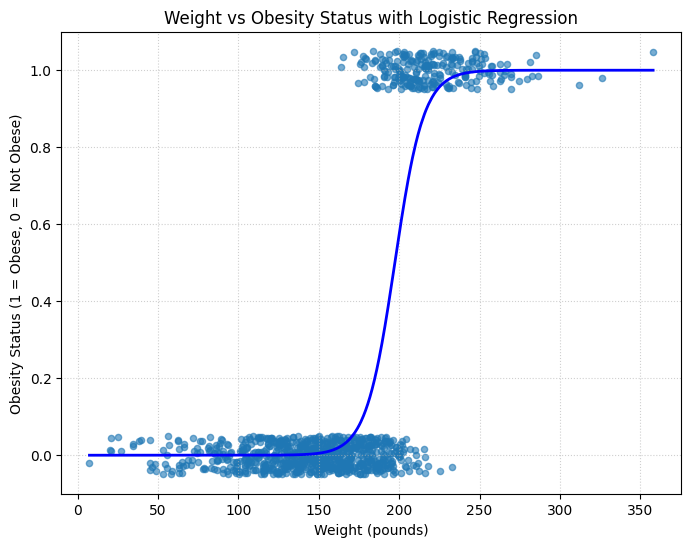

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

# Set seed for reproducibility
np.random.seed(1)

n = 1000  # number of observations

# Generate random weights (in pounds)
weights = np.random.normal(loc=160, scale=50, size=n)

# Generate binary obesity status (1 for obese, 0 for not obese)
obesity_threshold = 200
# Logistic function for probability of obesity
prob_obese = 1 / (1 + np.exp(-(weights - obesity_threshold) / 10))
obesity_status = np.random.binomial(1, prob_obese)

# Create data frame
df = pd.DataFrame({'Weight': weights, 'Obese': obesity_status})

# Fit a *logistic* regression model (using statsmodels.formula.api)
logit_model = sm.logit("Obese ~ Weight", data=df).fit()  # Use sm.logit, not sm.ols
df['Predicted'] = logit_model.predict(df)  # Get predicted probabilities

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot with jitter
ax.scatter(df['Weight'], df['Obese'] + np.random.uniform(-0.05, 0.05, size=n),
           alpha=0.6, s=20)

# Add the *logistic* regression curve (using the predicted probabilities)
# Sort the x-values for a smooth curve
df_sorted = df.sort_values('Weight')
ax.plot(df_sorted['Weight'], df_sorted['Predicted'], color='blue', linewidth=2)


# Add labels and title
ax.set_xlabel("Weight (pounds)")
ax.set_ylabel("Obesity Status (1 = Obese, 0 = Not Obese)")
ax.set_title("Weight vs Obesity Status with Logistic Regression")

# Extend y-axis limits (optional, but good for showing probabilities)
ax.set_ylim(-0.1, 1.1)  # Show the full 0-1 probability range

# Customize appearance (optional)
ax.grid(True, linestyle=':', alpha=0.6)

plt.show()


# --- Alternative Plotting (using Seaborn) ---
# import seaborn as sns
# fig, ax = plt.subplots(figsize = (8,6))
# sns.regplot(x='Weight', y='Obese', data=df, ci=None,
#             scatter_kws={'alpha':0.6, 's':20, 'y_jitter':0.05},
#             line_kws={'color':'blue'},
#             logistic=True, #  *Important*: Set logistic=True for logistic regression.
#             ax=ax)
# ax.set_ylim(-0.1, 1.1)
# plt.show()






## Logit Derivation



So what would we rather have happen. Well what we really want is:

- To predict how a change in $x$ causes a change in the probability that $y=1$.
- To ensure that even if we do not restrict what values $x$ can take, we have values of $y$ that are possible.



Well even if the probability of y is limited between 0 and 1, we can look at a function of the probability, and this function would not have the same limits, meaning it could range from $- \infty$ to $\infty$ as we had before.



$$f(P(obese=1 | X))=\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon$$





### Odds


So instead of looking at the probability, let's see what is known as the **odds**, which is defined at the probability of something happening, divided by the probability of it not happening:


$$\frac{P(y=1)}{P(y=0)}$$

And if there are only two outcomes, is the same as:


$$\frac{P(y=1)}{1-P(y=1)}$$




So if $P(y=1)=0.75$, then $P(y=0)=1-P(y=1)=1-0.75=025$, then the odds are $$\frac{P(y=1)}{1-P(y=1)}=\frac{0.75}{0.25}=1$$

Or we would say the odds are three to one (3:1).









So what happens at the extremes? Well, let's consider the case where the probability is essentially 1, let's say that Mike Tyson would beat me in a fight, well then the odds are:


$$\frac{P(y=1)}{1-P(y=1)}$$

$$\lim_{P(y=1) \to 1} \frac{P(y=1)}{1 - P(y=1)}=\frac{1}{0}=\infty$$


And on the converse, if we consider something that will not happen, such as the sun exploding today, then the odds are:


$$\lim_{P(y=1) \to 0} \frac{P(y=1)}{1 - P(y=1)}=\frac{0}{1}=0$$



This means that regardless of the range of x, the range of the odds are brounded by 0 and infinity. This is a step in the right direction, since it removed the upper bound of 1.







### Log Odds


So since that removed the upper bound, we want a function of this which removes the lower bound. Well thankfully we have a well known function known as the log. This has two interesting properties. 

$$log(0)=-\infty$$

And 


$$log(\infty )=\infty$$




Which means that if we take the log of our odds, this function now has no bounds:



$$\lim_{P(y=1) \to 1} log(\frac{P(y=1)}{1 - P(y=1)})=\infty$$


And


$$\lim_{P(y=1) \to 0} log(\frac{P(y=1)}{1 - P(y=1)})=-\infty$$



That means that since we run into problems with estimating the following, because of the constraints of y:



$$P(y=1 | X)=\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon$$


We can instead remove these constraints and instead estimate:

$$log(\frac{P(y=1)}{1 - P(y=1)})=\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon$$




**This is what is known as the logistic regression model.** Specifically the logit model.




While this is the functional form, the **estimation is done with Maximum Liklihood Estimation**, and the derivation of that is fairly involved, and we probably do not want to go through that, so we can assume the statistical software does that estimation correctly. But given that, we can look at how we can interpret those coefficients.



In [4]:
# Create visualization here

## Interpreting coefficients


In our linear regressions before, the interpretation of the regression coefficient would mean that one change in variable X, would result in a $\beta$ change in y. Or in the following, we would expect someone to gain 2.5 pounds for each inch of height.




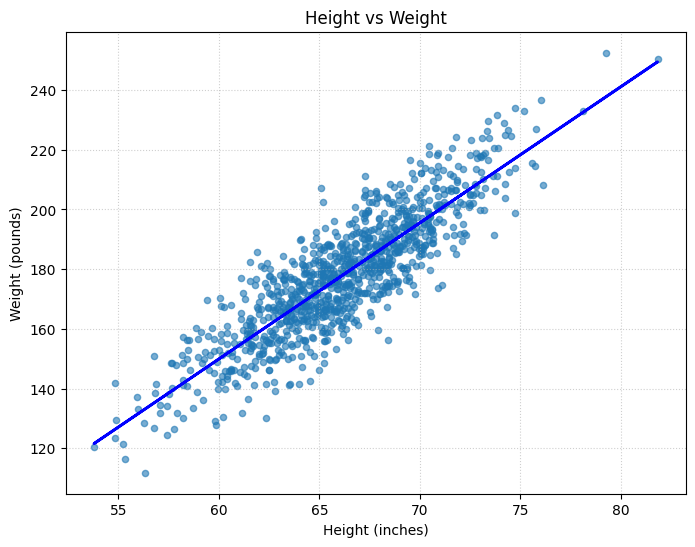

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm  # For the regression line

# Set seed for reproducibility
np.random.seed(1)

n = 1000  # number of observations

# Generate random heights (in inches)
heights = np.random.normal(loc=66, scale=4, size=n)

# Generate weights (in pounds) with a linear relationship to height
epsilon = np.random.normal(loc=0, scale=10, size=n)  # Error term
beta0 = -120  # Intercept parameter (base weight)  Note:  Often needs adjustment
beta1 = 4.5  # Slope parameter (weight per inch)   Note:  Often needs adjustment

weights = beta0 + beta1 * heights + epsilon

# Create data frame
df = pd.DataFrame({'Height': heights, 'Weight': weights})

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of the data
ax.scatter(df['Height'], df['Weight'], alpha=0.6, s=20)  # Adjust 's' for point size

# Add regression line (using statsmodels for a clean fit)
model = sm.ols("Weight ~ Height", data=df).fit()
predictions = model.predict(df)
ax.plot(df['Height'], predictions, color='blue', linewidth=2)


# Add labels and title
ax.set_xlabel("Height (inches)")
ax.set_ylabel("Weight (pounds)")
ax.set_title("Height vs Weight")

# Customize appearance (optional, but good practice)
ax.grid(True, linestyle=':', alpha=0.6)  # Add a subtle grid
# ax.set_facecolor('#f0f0f0') # Optional: Light gray background

plt.show()

# --- Alternative Plotting (using Seaborn, even simpler) ---
# import seaborn as sns
# sns.regplot(x='Height', y='Weight', data=df, ci=None, scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
# plt.show()





But what would the interpretation be here? Well a 1 unit change in x would be associated with a $\beta$ change in the log odds. This is kind of unnecessary to understand more than this, but a good rule of thumb is:


- If $\beta$ is positive, 
  - when $x \uparrow$ then $P(y=1) \uparrow$
  - when $x \downarrow$ then $P(y=1) \downarrow$
  
- If $\beta$ is negative, 
  - when $x \uparrow$ then $P(y=1) \downarrow$
  - when $x \downarrow$ then $P(y=1) \uparrow$

















## Predicting probability


Since the logistic regression is of the form:


$$log(\frac{P(y=1)}{1 - P(y=1)})=\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon$$


Once we run the logistic regression in whatever software we use, we will get estimates for all $\beta$'s. We could then predict the probability of that outcome occuring, given only their observed values. But how?


This is a little more straight forward than interpreting the coeffiecients themselves.

If we want the predicted probability, we can do some algebra on our original function, and get:


$$log(\frac{P(y=1)}{1 - P(y=1)})=\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon$$


$$e^{log(\frac{P(y=1)}{1 - P(y=1)})}=e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon}$$


$$\frac{P(y=1)}{1 - P(y=1)}=e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon}$$




$$P(y=1)=e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon}(1 - P(y=1))$$

$$P(y=1)=e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon} - P(y=1) \times e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon}$$

divide both sides by $P(y=1)$

$$1=\frac{e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon}}{P(y=1)} -e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon}$$

$$1+e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon}=\frac{e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon}}{P(y=1)}$$
$$\frac{1+e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon}}{e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots +\epsilon}}=\frac{1}{P(y=1)}$$
$$\frac{e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots}}{1+e^{\beta_0+\beta_1 x_1 +\beta_2 x_2 \cdots}}=P(y=1)$$

## Properties of the predicted probability


We can plot the predicted probability as a function of x, as:

$$\frac{e^{x}}{1+e^{x}}=P(y=1)$$



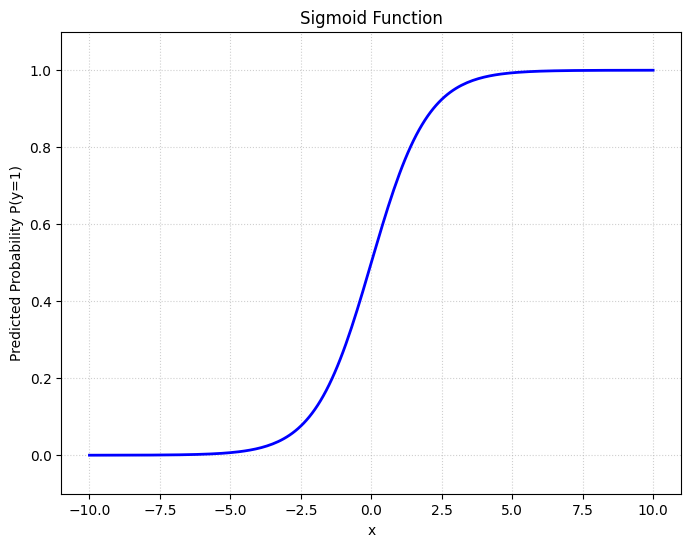

When the exponent is very low (e.g., -100), the predicted probability is approximately 0.00000000
When the exponent is very high (e.g., 100), the predicted probability is approximately 1.00000000


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the logistic (sigmoid) function
def logistic_function(x):
  return 1 / (1 + np.exp(-x))

# Create a sequence of values from -10 to 10
x_values = np.arange(-10, 10.1, 0.1)  # Use arange for floating-point step
# Calculate the logistic function for each value
y_values = logistic_function(x_values)

# Create a data frame for plotting (optional, but good practice)
logistic_df = pd.DataFrame({'x': x_values, 'y': y_values})

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the logistic function
ax.plot(logistic_df['x'], logistic_df['y'], color='blue', linewidth=2)

# Add labels and title
ax.set_xlabel("x")
ax.set_ylabel("Predicted Probability P(y=1)")
ax.set_title("Sigmoid Function")

# Extend y-axis limits slightly
ax.set_ylim(-0.1, 1.1)

# Customize appearance (optional)
ax.grid(True, linestyle=':', alpha=0.6)

plt.show()

# Demonstrate the behavior for very low and very high values
low_value = -100
high_value = 100
low_prob = logistic_function(low_value)
high_prob = logistic_function(high_value)

print(f"When the exponent is very low (e.g., {low_value}), the predicted probability is approximately {low_prob:.8f}")  # Use f-string for formatting
print(f"When the exponent is very high (e.g., {high_value}), the predicted probability is approximately {high_prob:.8f}")



## Benefits


- Limits range of predicted probability between 0 and 1.

- Predicted impact of $x_i$ is conditional on $x_j$.

- Could give classification ranges based on predicted probability.








## Use cases








## Example


Let’s manually compute the probability of smoking for (i) all workers, (ii) workers affected by workplace smoking bans, and, (iii) workers not affected by workplace smoking bans.


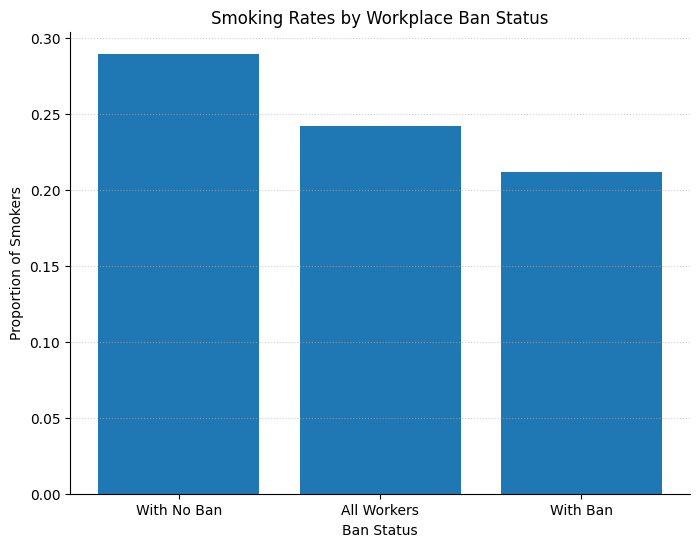

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf  # For a closer equivalent to AER's data loading
import numpy as np

# Load the SmokeBan data (using statsmodels, which includes it)
#  AER's `data(SmokeBan)` loads it into the environment.
#  statsmodels makes datasets available via .get_rdataset()
try:
    data = sm.datasets.get_rdataset("SmokeBan", "AER").data
except AttributeError:  # Handle older statsmodels versions
    #   In older statsmodels versions, you load data differently
    data = smf.datasets.get_rdataset("SmokeBan", "AER", cache=True).data


# Creating binary version of smoker
data['binarySmoker'] = (data['smoker'] == 'yes').astype(int)

# Probability of smoking of all workers
pSmokingAll = data['binarySmoker'].mean()

# Probability of smoking of workers with ban
pSmokingBan = data.loc[data['ban'] == 'yes', 'binarySmoker'].mean()

# Probability of smoking of workers with no ban
pSmokingNoBan = data.loc[data['ban'] == 'no', 'binarySmoker'].mean()


# Create a DataFrame for plotting (like in R)
pSmoking = pd.DataFrame({
    'y': [pSmokingNoBan, pSmokingAll, pSmokingBan],
    'ban': ["With No Ban", "All Workers", "With Ban"]
})

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot (using matplotlib directly)
ax.bar(pSmoking['ban'], pSmoking['y'], color="#1f77b4")  # Access columns by name
#Note, the default matplotlib color is a good choice.

# Add labels and title
ax.set_xlabel("Ban Status")  # More descriptive x-label
ax.set_ylabel("Proportion of Smokers")
ax.set_title("Smoking Rates by Workplace Ban Status")


# Customize appearance (optional)
ax.grid(axis='y', linestyle=':', alpha=0.6)  # Add a subtle grid
ax.spines['top'].set_visible(False)       # Remove top spine
ax.spines['right'].set_visible(False)     # Remove right spine

plt.show()


# --- Alternative using Seaborn (more concise)
# import seaborn as sns
# fig, ax = plt.subplots(figsize=(8, 6))
# sns.barplot(x='ban', y='y', data=pSmoking, ax=ax, order=["With No Ban", "All Workers", "With Ban"], palette="deep")
# ax.set_xlabel("Ban Status")
# ax.set_ylabel("Proportion of Smokers")
# ax.set_title("Smoking Rates by Workplace Ban Status")
# plt.show()



This suggests approximately a 10 percentage point decrease in the probability of smoking if there is a smoking ban.


But we can be even more precise with a regression. Here we can even run a linear model and a logit regression.




In [8]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from IPython.display import HTML
from statsmodels.iolib.summary2 import summary_col

# Load the SmokeBan data
try:
    data = sm.datasets.get_rdataset("SmokeBan", "AER").data
except AttributeError:
    data = smf.datasets.get_rdataset("SmokeBan", "AER", cache=True).data

# Convert 'education' to categorical and set 'hs drop out' as reference
data['education'] = pd.Categorical(data['education'])
data['education'] = data['education'].cat.reorder_categories(
    ['hs drop out', 'hs', 'some college', 'college', 'master'], ordered=True
)

# Creating binary version of smoker
data['binarySmoker'] = (data['smoker'] == 'yes').astype(int)

# Estimating linear probability model
linear_model = smf.ols("binarySmoker ~ ban + age + I(age**2) + education + afam + hispanic + gender", data=data).fit()

# Estimating logit model
logit_model = smf.logit("binarySmoker ~ ban + age + I(age**2) + education + afam + hispanic + gender", data=data).fit()

# --- Dynamically Generate Covariate Labels ---
variable_labels = []
base_labels = {  #  Base labels *without* the level
    'ban[T.yes]': "Ban (yes = 1)",  # Explicitly handle the 'ban' variable
    'age': "Age",
    'I(age ** 2)': "Age^2",
    'education': "Education",  # Base label for education
    'afam[T.yes]': "African-American (yes = 1)",  # Explicitly handle afam
    'hispanic[T.yes]': "Hispanic (yes = 1)",  # Explicitly handle hispanic
    'gender[T.female]': "Gender (Female = 1)"   # Explicitly handle gender
}

for name in linear_model.params.index:  # Iterate through *actual* coefficient names
    if name in base_labels:
        variable_labels.append(base_labels[name])
    elif name.startswith('education'):
        # Extract the education level from the coefficient name
        level = name.replace('education[T.', '').replace(']', '')
        # Construct the label dynamically
        variable_labels.append(f"Education ({level} = 1)")
    else:
        variable_labels.append(name) #Keep original in this scenario

# --- Create the summary table ---

results_table = summary_col(
    [linear_model, logit_model],
    stars=True,
    float_format='%0.3f',
    model_names=['Linear', 'Logit'],
    info_dict={
        'N': lambda x: f"{x.nobs:.0f}",
        'R2': lambda x: f"{x.rsquared:.3f}" if hasattr(x, 'rsquared') else f"{x.prsquared:.3f}"
    },
     regressor_order=linear_model.params.index.tolist(), #Ensure correct order
    drop_omitted=True
)

# NO MORE MANUAL LABEL REPLACEMENT

# Display output as HTML
HTML(results_table.as_html())

Optimization terminated successfully.
         Current function value: 0.523400
         Iterations 6


,Linear,Logit
Intercept,0.275***,-1.173***
,(0.042),(0.245)
ban[T.yes],-0.047***,-0.262***
,(0.009),(0.049)
education[T.hs],-0.090***,-0.438***
,(0.016),(0.084)
education[T.some college],-0.158***,-0.787***
,(0.017),(0.087)
education[T.college],-0.278***,-1.570***
,(0.018),(0.102)



Interpretation

- Both models predict that the smoking ban reduces the probability of smoking. And the effect is statistically different than zero.

- The linear probability model predicts that the reduction in probability of being a smoker caused by the smoking ban is 5 percent.

- The logit model predicts that the odds of being a smoker relative to not being a smoker are change by a factor of $e^{\beta}\approx 0.7695$

- In the linear regression model, the effect is always the same, regardless of the value of the other control variables.


In the logistic model, the effect of the x variable depends on the value of the other control variables. For instance, consider that we have two individuals that are: 30 years old, with a college degree, that is not African-american, and not Hispanic, but one is male and the other is female. Do you think the effect of the ban will be the same for both genders?


To answer this question we can use the invlogit function to get our predicted probability of smoking for different individuals:


In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import display, Markdown

# Load the SmokeBan data
try:
    data = sm.datasets.get_rdataset("SmokeBan", "AER").data
except AttributeError:
    data = smf.datasets.get_rdataset("SmokeBan", "AER", cache=True).data

# Convert 'education' to categorical and set 'hs drop out' as reference
data['education'] = pd.Categorical(data['education'])
data['education'] = data['education'].cat.reorder_categories(
    ['hs drop out', 'hs', 'some college', 'college', 'master'], ordered=True
)
# Creating binary version of smoker
data['binarySmoker'] = (data['smoker'] == 'yes').astype(int)

# Estimating logit model  (we need the fitted model from before)
logit_model = smf.logit("binarySmoker ~ ban + age + I(age**2) + education + afam + hispanic + gender", data=data).fit()

# --- Data for Predictions ---

# Data for male without ban
dataMaleNoBan = pd.DataFrame({
    'ban': [0],          # no ban
    'age': [30],         # age
    'I(age ** 2)': [30**2],  # age^2
    'education': ['college'],  # college degree (reference is 'hs drop out')
    'afam': [0],        # african-american
    'hispanic': [0],    # hispanic
    'gender': ['male']    # male
})

# Data for male with ban
dataMaleBan = dataMaleNoBan.copy()  #  Make a copy to avoid modifying the original
dataMaleBan['ban'] = 1

# Data for female without ban
dataFemaleNoBan = dataMaleNoBan.copy()
dataFemaleNoBan['gender'] = 'female'

# Data for female with ban
dataFemaleBan = dataMaleBan.copy()
dataFemaleBan['gender'] = 'female'

# --- Prediction Function (invlogit) ---

def invlogit(betas, data):
  """Calculates the predicted probability from a logistic regression.

  Args:
      betas: A list or array of coefficients (including the intercept).
      data:  A Pandas DataFrame with the covariate values.  Must have the
             same columns as the data used to fit the model.
  Returns:
      The predicted probability (a float between 0 and 1).
  """
  # Convert the data and betas into the right format for matrix multiplication
  exog = pd.get_dummies(data, drop_first=True) #Handle categorical variables
  #Ensure all columns are accounted for
  exog = exog.reindex(columns=logit_model.params.index.drop('Intercept'), fill_value=0)

  linear_combination = betas[0] + np.dot(betas[1:], exog.values.T)
  pY = np.exp(linear_combination) / (1 + np.exp(linear_combination))
  return pY[0]  # Return the scalar probability


# --- Computing Probabilities ---

betas = logit_model.params.values  # Get the coefficients as a NumPy array

pMaleBan = invlogit(betas, dataMaleBan)
pMaleNoBan = invlogit(betas, dataMaleNoBan)
pFemaleBan = invlogit(betas, dataFemaleBan)
pFemaleNoBan = invlogit(betas, dataFemaleNoBan)

# Calculating changes in probabilities
effectForMales = pMaleBan - pMaleNoBan
effectForFemales = pFemaleBan - pFemaleNoBan

# --- Creating DataFrame for Table Output ---

pData = pd.DataFrame({
    'male': [pMaleBan, pMaleNoBan, effectForMales],
    'female': [pFemaleBan, pFemaleNoBan, effectForFemales]
})
pData = (pData * 100).round(4)  # Convert to percentage and round
pData.index = ["Ban", "No Ban", "Difference"]

# --- Displaying the Table (using Markdown for simplicity) ---

# Create the Markdown table string
table_md = "|               | Male     | Female   |\n"
table_md += "|:--------------|:---------|:---------|\n"
for row in pData.index:
    table_md += f"| {row}          | {pData.loc[row, 'male']:.4f} | {pData.loc[row, 'female']:.4f} |\n"

footnote = "Predicted smoking probabilities for an individual that is 30 years old, \n with a college degree, that is not african-american, and not hispanic."
display(Markdown(table_md + "\n\n" + footnote))

#Alternative, but more complicated method using to_markdown()
#display(Markdown(pData.to_markdown() + "\n\n" + footnote))

# --- Alternative (using pandas styling for HTML output - more complex)
#
# styled_#table = pData.style.format("{:.4f}").set_#table_styles([
#       {'selector': 'th', 'props': [('text-align', 'left')]}, # Left-align headers
#     {'selector': '.row_heading', 'props': [('text-align', 'left')]}, #Left allign index
#       {'selector': '', 'props': [('border', '1px solid black')]} # Add borders (optional)
#   ]).set_caption(footnote)
# display(styled_table)

Optimization terminated successfully.
         Current function value: 0.523400
         Iterations 6


|               | Male     | Female   |
|:--------------|:---------|:---------|
| Ban          | 47.2186 | 47.2186 |
| No Ban          | 47.2186 | 47.2186 |
| Difference          | 0.0000 | 0.0000 |


Predicted smoking probabilities for an individual that is 30 years old, 
 with a college degree, that is not african-american, and not hispanic.

testing commit